# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [128]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "..Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

beginning data retrival
-----------------------
processing record 1 of set 1 | jamestown
processing record 2 of set 1 | atar
processing record 3 of set 1 | clyde river
processing record 4 of set 1 | bur gabo
City not found. Skipping...
processing record 5 of set 1 | alta floresta
processing record 6 of set 1 | namibe
processing record 7 of set 1 | hobart
processing record 8 of set 1 | khatanga
processing record 9 of set 1 | jamame
processing record 10 of set 1 | bethel
processing record 11 of set 1 | saskylakh
processing record 12 of set 1 | nanortalik
processing record 13 of set 1 | ahuimanu
processing record 14 of set 1 | puerto ayora
processing record 15 of set 1 | busselton
processing record 16 of set 1 | kapaa
processing record 17 of set 1 | amderma
City not found. Skipping...
processing record 18 of set 1 | yumen
processing record 19 of set 1 | saint-pierre
processing record 20 of set 1 | labuhan
processing record 21 of set 1 | lebu
processing record 22 of set 1 | cidreira
proces

processing record 37 of set 4 | luderitz
processing record 38 of set 4 | ati
processing record 39 of set 4 | rio verde de mato grosso
processing record 40 of set 4 | avera
processing record 41 of set 4 | savonlinna
processing record 42 of set 4 | loralai
processing record 43 of set 4 | luganville
processing record 44 of set 4 | buraydah
processing record 45 of set 4 | toamasina
processing record 46 of set 4 | cherskiy
processing record 47 of set 4 | tanout
processing record 48 of set 4 | coahuayana
processing record 49 of set 4 | mys shmidta
City not found. Skipping...
processing record 50 of set 4 | sao filipe
processing record 1 of set 5 | atambua
processing record 2 of set 5 | sungaipenuh
processing record 3 of set 5 | banmo
City not found. Skipping...
processing record 4 of set 5 | fortuna
processing record 5 of set 5 | port hardy
processing record 6 of set 5 | bengkulu
processing record 7 of set 5 | emerald
processing record 8 of set 5 | muroto
processing record 9 of set 5 | const

processing record 28 of set 8 | airai
processing record 29 of set 8 | ipixuna
processing record 30 of set 8 | kuche
City not found. Skipping...
processing record 31 of set 8 | aranzazu
processing record 32 of set 8 | prescott
processing record 33 of set 8 | kainantu
processing record 34 of set 8 | saint george
processing record 35 of set 8 | tuatapere
processing record 36 of set 8 | san patricio
processing record 37 of set 8 | marystown
processing record 38 of set 8 | ponta do sol
processing record 39 of set 8 | arrecife
processing record 40 of set 8 | coachella
processing record 41 of set 8 | tiarei
processing record 42 of set 8 | hay river
processing record 43 of set 8 | kulu
processing record 44 of set 8 | mansa
processing record 45 of set 8 | chardara
processing record 46 of set 8 | san german
processing record 47 of set 8 | aflu
City not found. Skipping...
processing record 48 of set 8 | lafia
processing record 49 of set 8 | boyolangu
processing record 50 of set 8 | andenes
proces

processing record 14 of set 12 | leningradskiy
processing record 15 of set 12 | matou
processing record 16 of set 12 | dzhusaly
City not found. Skipping...
processing record 17 of set 12 | north bend
processing record 18 of set 12 | mecca
processing record 19 of set 12 | aksha
processing record 20 of set 12 | petrovsk
processing record 21 of set 12 | beboto
processing record 22 of set 12 | dargaville
processing record 23 of set 12 | san ramon de la nueva oran
processing record 24 of set 12 | garissa
processing record 25 of set 12 | mbandaka
processing record 26 of set 12 | flinders
processing record 27 of set 12 | seymchan
processing record 28 of set 12 | rosario
processing record 29 of set 12 | kankon
processing record 30 of set 12 | suntar
processing record 31 of set 12 | rio claro
processing record 32 of set 12 | ratnagiri
processing record 33 of set 12 | morristown
processing record 34 of set 12 | panzhihua
processing record 35 of set 12 | shar
processing record 36 of set 12 | quat

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,34.00,86,90,14.99,US,1580062115
1,atar,20.52,-13.05,82.33,17,99,11.48,MR,1580062346
2,clyde river,70.47,-68.59,-18.40,68,75,16.11,CA,1580062346
3,alta floresta,-9.88,-56.09,89.60,66,40,4.70,BR,1580062346
4,namibe,-15.20,12.15,77.00,73,20,9.17,AO,1580062346
...,...,...,...,...,...,...,...,...,...
543,auburn,47.31,-122.23,51.80,81,90,11.41,US,1580062353
544,sri aman,1.24,111.46,77.00,94,97,1.54,MY,1580062414
545,helena,46.59,-112.04,37.00,74,1,1.68,US,1580062164
546,miyako,39.64,141.95,27.48,63,0,5.77,JP,1580062414


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key +"&q="

city_data=[]
record_count=1
set_count=1

print("beginning data retrival")
print('-----------------------')

for i,city in enumerate(cities):
    
    if(i%50==0 and i>=50):
        record_count=1
        set_count+=1
        
    print(f'processing record {record_count} of set {set_count} | {city}')
    record_count+=1
    response = requests.get(url+city).json()
    try:
        city_data.append({
            "City": city,
            "Lat": response['coord']['lat'],
            'Lon': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind Speed': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    except:
        print('City not found. Skipping...')
        pass
print('------------------------')
print('Data retrieval completed')
print('------------------------')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:

df = pd.DataFrame(city_data)

df1= df[['City','Cloudiness','Country','Date',
        'Humidity','Lat','Lon','Max Temp','Wind Speed']].rename(
        columns = {'Lon' : 'Lng'})

df1.to_csv('cities.csv',index=True)
df1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,90,US,1580062115,86,42.10,-79.24,34.00,14.99
1,atar,99,MR,1580062346,17,20.52,-13.05,82.33,11.48
2,clyde river,75,CA,1580062346,68,70.47,-68.59,-18.40,16.11
3,alta floresta,40,BR,1580062346,66,-9.88,-56.09,89.60,4.70
4,namibe,20,AO,1580062346,73,-15.20,12.15,77.00,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

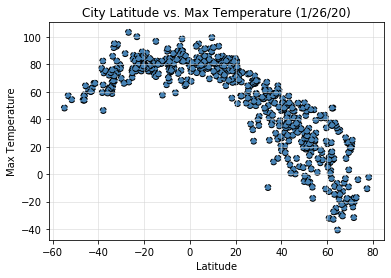

In [78]:
plt.title('City Latitude vs. Max Temperature (1/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

x =df1['Lat']
plt.grid(color = 'lightgrey', linestyle = '-',linewidth = .5)
plt.scatter(x,df1['Max Temp'], color = 'steelblue', marker = 'o', linestyle = 'dashed',
           linewidth = 1, ec = 'black')

plt.show()

#### Latitude vs. Humidity Plot

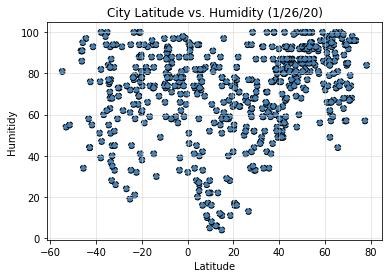

In [90]:

plt.title('City Latitude vs. Humidity (1/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

x =df1['Lat']
plt.grid(color = 'lightgrey', linestyle = '-',linewidth = .5)
plt.scatter(x,df1['Humidity'], color = 'steelblue', marker = 'o', linestyle = 'dashed',
           linewidth = 1, ec = 'black')

plt.show()

#### Latitude vs. Cloudiness Plot

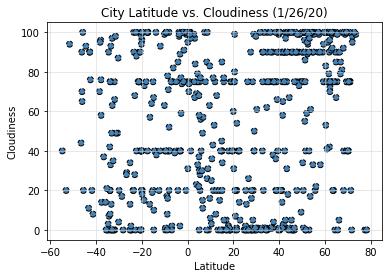

In [91]:
plt.title('City Latitude vs. Cloudiness (1/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

x =df1['Lat']
plt.grid(color = 'lightgrey', linestyle = '-',linewidth = .5)
plt.scatter(x,df1['Cloudiness'], color = 'steelblue', marker = 'o', linestyle = 'dashed',
           linewidth = 1, ec = 'black')

plt.show()

#### Latitude vs. Wind Speed Plot

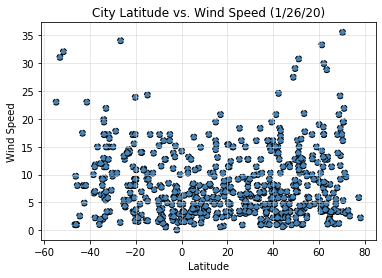

In [93]:
plt.title('City Latitude vs. Wind Speed (1/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

x =df1['Lat']
plt.grid(color = 'lightgrey', linestyle = '-',linewidth = .5)
plt.scatter(x,df1['Wind Speed'], color = 'steelblue', marker = 'o', linestyle = 'dashed',
           linewidth = 1, ec = 'black')

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
# st

In [122]:
# Create Northern and Southern Hemisphere DataFrames
#getting north hemisphere
n_hemi= df1.loc[df1['Lat'] >= 0]
n_hemi['Hemisphere'] = 'North'

#getting south hemisphere
s_hemi = df1.loc[df1['Lat'] < 0]
s_hemi['Hemisphere'] = 'South'

n_hemi

C:\Users\adfil\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\adfil\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,jamestown,90,US,1580062115,86,42.10,-79.24,34.00,14.99,North
1,atar,99,MR,1580062346,17,20.52,-13.05,82.33,11.48,North
2,clyde river,75,CA,1580062346,68,70.47,-68.59,-18.40,16.11,North
6,khatanga,95,RU,1580062346,98,71.97,102.50,-19.89,3.06,North
7,jamame,31,SO,1580062346,88,0.07,42.75,80.91,14.23,North
...,...,...,...,...,...,...,...,...,...,...
543,auburn,90,US,1580062353,81,47.31,-122.23,51.80,11.41,North
544,sri aman,97,MY,1580062414,94,1.24,111.46,77.00,1.54,North
545,helena,1,US,1580062164,74,46.59,-112.04,37.00,1.68,North
546,miyako,0,JP,1580062414,63,39.64,141.95,27.48,5.77,North


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.87


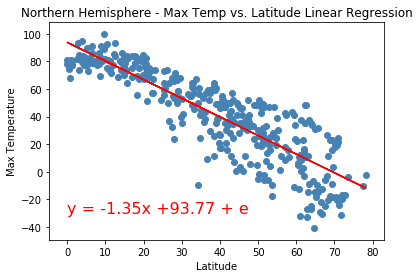

In [177]:
#setting x and y
x =n_hemi['Lat']
y = n_hemi['Max Temp']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#formatting equation
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(0,-30), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.scatter(x,y, color = 'steelblue', marker = 'o')

print('The r-squared is ' + str(r))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.56


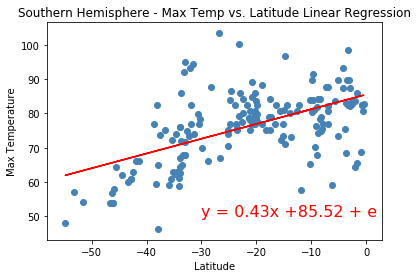

In [178]:
#setting x and y
x =s_hemi['Lat']
y = s_hemi['Max Temp']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(-30,50), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.scatter(x,y, color = 'steelblue', marker = 'o')


print('The r-squared is ' + str(r))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.47


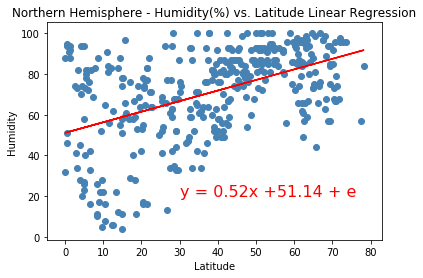

In [179]:
#setting x and y
x =n_hemi['Lat']
y = n_hemi['Humidity']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(30,20), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(x,y, color = 'steelblue', marker = 'o')


print('The r-squared is ' + str(r))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.15


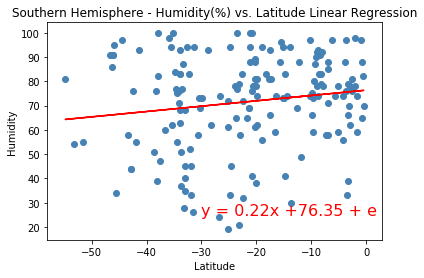

In [180]:
#setting x and y
x =s_hemi['Lat']
y = s_hemi['Humidity']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(-30,25), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(x,y, color = 'steelblue', marker = 'o')


print('The r-squared is ' + str(r))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.3


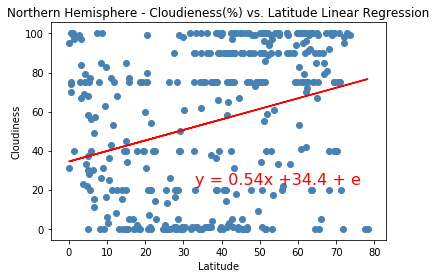

In [181]:
#setting x and y
x =n_hemi['Lat']
y = n_hemi['Cloudiness']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(33,23), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Northern Hemisphere - Cloudieness(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(x,y, color = 'steelblue', marker = 'o')


print('The r-squared is ' + str(r))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.16


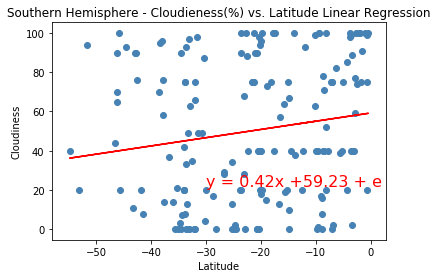

In [182]:
#setting x and y
x =s_hemi['Lat']
y = s_hemi['Cloudiness']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(-30,22), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Southern Hemisphere - Cloudieness(%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(x,y, color = 'steelblue', marker = 'o')


print('The r-squared is ' + str(r))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.2


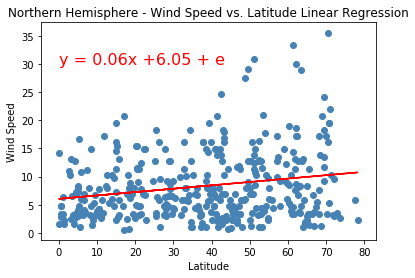

In [185]:
#setting x and y
x =n_hemi['Lat']
y = n_hemi['Wind Speed']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(0,30), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(x,y, color = 'steelblue', marker = 'o')


print('The r-squared is ' + str(r))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.26


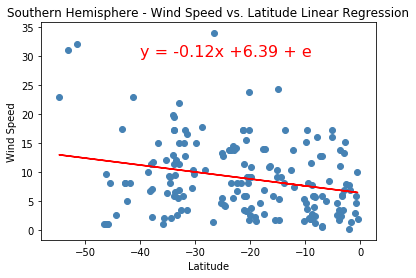

In [188]:
#setting x and y
x =s_hemi['Lat']
y = s_hemi['Wind Speed']

#regression
slope,intercept, r_value, p_value, std_err = st.linregress(x,y)

#checking r square value against pearson coefficient
r = round(r_value,2)
slope = round(slope,2)
intercept = round(intercept,2)

#creating text for equation for graph
line_eq = "y = " + str(slope) + "x +"+ str(intercept) + ' + e'

#creating regression values for best fit line
regress_values = x*slope + intercept

#creating line of best fit and where to put line equation
plt.plot(x,regress_values,'r-')
plt.annotate(line_eq,(-40,30), fontsize = 16,color = 'red')


#labels/formats for plot
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(x,y, color = 'steelblue', marker = 'o')


print('The r-squared is ' + str(r))
plt.show()